In [1]:
from exp.nb_05 import * 

In [2]:
#export
class AvgStats():
    def __init__(self, metrics, in_train): self.metrics,self.in_train = listify(metrics),in_train
    
    def reset(self):
        self.tot_loss,self.count = 0.,0
        self.tot_mets = [0.] * len(self.metrics)
        
    @property
    def all_stats(self): return self.tot_mets[0].item()
    @property
    def avg_stats(self): return self.all_stats/self.count
    
    def __repr__(self):
        if not self.count: return ""
        return f"{'train' if self.in_train else 'valid'},{self.avg_stats}"

    def accumulate(self, run):
        bn = run.xb.shape[0]
        self.tot_loss += run.loss * bn
        self.count += bn
        for i,m in enumerate(self.metrics):
            batch_met = m(run.pred, run.yb)
            self.tot_mets[i] +=  batch_met* bn

class AvgStatsCallback(Callback):
    def __init__(self, metrics):
        self.train_stats,self.valid_stats = AvgStats(metrics,True),AvgStats(metrics,False)
        
    def begin_epoch(self):
        self.train_stats.reset()
        self.valid_stats.reset()
        
    def after_loss(self):
        stats = self.train_stats if self.in_train else self.valid_stats
        with torch.no_grad(): stats.accumulate(self.run)
    
    def after_epoch(self):
        print(self.train_stats)
        print(self.valid_stats)

In [3]:
#export
def get_model(data,lr=0.5,nh=50):
    m = data.train_ds.x.shape[1]
    model = nn.Sequential(nn.Linear(m,nh),nn.ReLU(),nn.Linear(nh,data.c))
    return model,optim.SGD(model.parameters(),lr=lr)

In [4]:
x_train,y_train,x_valid,y_valid = get_data()
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
nh,bs = 50,128
c = y_train.max().item()+1
loss_func = F.cross_entropy

In [5]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)



In [6]:
#export
def create_learner(model_func, loss_func, data):
    return Learner(*model_func(data), loss_func, data)

## BaseLine: 1

In [7]:
#export
def get_model(data,lr=0.5,nh=50):
    m = data.train_ds.x.shape[1]
    model = nn.Sequential(nn.Linear(m,nh),nn.ReLU(),nn.Linear(nh,data.c))
    return model,optim.SGD(model.parameters(),lr=lr)

In [8]:
def running(get_model):
    learn = create_learner(get_model, loss_func, data)
    run = Runner([AvgStatsCallback([accuracy])])
    run.fit(1, learn)

In [110]:
for it in range(200):
    running(get_model)

train,0.8932166666666667
valid,0.9315
train,0.8675
valid,0.9368
train,0.7720333333333333
valid,0.7835
train,0.8518
valid,0.9148
train,0.8654
valid,0.9369
train,0.8396666666666667
valid,0.9381
train,0.87215
valid,0.9351
train,0.8792666666666666
valid,0.94
train,0.8940166666666667
valid,0.9401
train,0.85875
valid,0.9185
train,0.8459
valid,0.9189
train,0.87325
valid,0.9477
train,0.9037333333333334
valid,0.9524
train,0.8477666666666667
valid,0.9269
train,0.8066833333333333
valid,0.898
train,0.8947666666666667
valid,0.9403
train,0.8806666666666667
valid,0.9403
train,0.8753666666666666
valid,0.9384
train,0.88765
valid,0.9369
train,0.8687333333333334
valid,0.8749
train,0.8785833333333334
valid,0.9365
train,0.8847166666666667
valid,0.9272
train,0.88175
valid,0.9455
train,0.8150833333333334
valid,0.9294
train,0.8602166666666666
valid,0.925
train,0.8825833333333334
valid,0.9304
train,0.8414
valid,0.9146
train,0.86675
valid,0.9302
train,0.8712833333333333
valid,0.9284
train,0.87065
valid,0.931
tr

In [112]:
q = '''
train,0.8932166666666667
valid,0.9315
train,0.8675
valid,0.9368
train,0.7720333333333333
valid,0.7835
train,0.8518
valid,0.9148
train,0.8654
valid,0.9369
train,0.8396666666666667
valid,0.9381
train,0.87215
valid,0.9351
train,0.8792666666666666
valid,0.94
train,0.8940166666666667
valid,0.9401
train,0.85875
valid,0.9185
train,0.8459
valid,0.9189
train,0.87325
valid,0.9477
train,0.9037333333333334
valid,0.9524
train,0.8477666666666667
valid,0.9269
train,0.8066833333333333
valid,0.898
train,0.8947666666666667
valid,0.9403
train,0.8806666666666667
valid,0.9403
train,0.8753666666666666
valid,0.9384
train,0.88765
valid,0.9369
train,0.8687333333333334
valid,0.8749
train,0.8785833333333334
valid,0.9365
train,0.8847166666666667
valid,0.9272
train,0.88175
valid,0.9455
train,0.8150833333333334
valid,0.9294
train,0.8602166666666666
valid,0.925
train,0.8825833333333334
valid,0.9304
train,0.8414
valid,0.9146
train,0.86675
valid,0.9302
train,0.8712833333333333
valid,0.9284
train,0.87065
valid,0.931
train,0.8847833333333334
valid,0.9447
train,0.8331833333333334
valid,0.9272
train,0.8819333333333333
valid,0.9405
train,0.85425
valid,0.9302
train,0.8855666666666666
valid,0.9419
train,0.8728666666666667
valid,0.9377
train,0.8439333333333333
valid,0.9334
train,0.8744666666666666
valid,0.9266
train,0.8721833333333333
valid,0.8827
train,0.8654666666666667
valid,0.9369
train,0.8714
valid,0.9395
train,0.8338333333333333
valid,0.9215
train,0.8710333333333333
valid,0.9296
train,0.8972
valid,0.9305
train,0.8662833333333333
valid,0.9373
train,0.86505
valid,0.9307
train,0.8912166666666667
valid,0.9503
train,0.8812
valid,0.934
train,0.795
valid,0.909
train,0.8761
valid,0.9354
train,0.8826166666666667
valid,0.9414
train,0.8582166666666666
valid,0.931
train,0.8771166666666667
valid,0.9388
train,0.8657833333333333
valid,0.923
train,0.8539833333333333
valid,0.9327
train,0.8900833333333333
valid,0.9393
train,0.871
valid,0.9434
train,0.86235
valid,0.9323
train,0.889
valid,0.9477
train,0.8697333333333334
valid,0.9326
train,0.8602166666666666
valid,0.9331
train,0.8611833333333333
valid,0.8992
train,0.8802
valid,0.9367
train,0.8130833333333334
valid,0.9188
train,0.8129166666666666
valid,0.9178
train,0.8946333333333333
valid,0.9424
train,0.8556
valid,0.9185
train,0.8604833333333334
valid,0.9336
train,0.8850666666666667
valid,0.9411
train,0.8651333333333333
valid,0.9307
train,0.8522166666666666
valid,0.9318
train,0.8474833333333334
valid,0.9068
train,0.8920833333333333
valid,0.93
train,0.84225
valid,0.9266
train,0.8799
valid,0.9347
train,0.8781833333333333
valid,0.9395
train,0.8676333333333334
valid,0.9207
train,0.8645
valid,0.9326
train,0.8370333333333333
valid,0.933
train,0.8815666666666667
valid,0.944
train,0.8717166666666667
valid,0.9241
train,0.86475
valid,0.9351
train,0.8848166666666667
valid,0.9486
train,0.8783166666666666
valid,0.9385
train,0.8736833333333334
valid,0.9385
train,0.8685833333333334
valid,0.9376
train,0.868
valid,0.9264
train,0.8838833333333334
valid,0.9406
train,0.89595
valid,0.9362
train,0.8782166666666666
valid,0.9431
train,0.8882333333333333
valid,0.9414
train,0.8596666666666667
valid,0.9287
train,0.8533833333333334
valid,0.91
train,0.8800333333333333
valid,0.9359
train,0.8877666666666667
valid,0.9437
train,0.8515
valid,0.9282
train,0.8659333333333333
valid,0.9359
train,0.8900333333333333
valid,0.9414
train,0.87965
valid,0.9373
train,0.8863166666666666
valid,0.9511
train,0.8728
valid,0.9359
train,0.87305
valid,0.9382
train,0.8546666666666667
valid,0.9348
train,0.87875
valid,0.9467
train,0.8845
valid,0.942
train,0.8661
valid,0.9349
train,0.8465166666666667
valid,0.9294
train,0.8425833333333334
valid,0.912
train,0.8701833333333333
valid,0.9389
train,0.8923333333333333
valid,0.9494
train,0.8807333333333334
valid,0.9428
train,0.87825
valid,0.9368
train,0.8708
valid,0.9326
train,0.8474333333333334
valid,0.9283
train,0.8755
valid,0.9379
train,0.88445
valid,0.9366
train,0.8699
valid,0.9331
train,0.8716833333333334
valid,0.9209
train,0.8667666666666667
valid,0.93
train,0.89735
valid,0.9524
train,0.8147166666666666
valid,0.913
train,0.8717166666666667
valid,0.9441
train,0.8825833333333334
valid,0.9425
train,0.8717
valid,0.9398
train,0.8932833333333333
valid,0.9416
train,0.8747
valid,0.9314
train,0.87065
valid,0.9375
train,0.8819333333333333
valid,0.9457
train,0.8350666666666666
valid,0.9069
train,0.8675333333333334
valid,0.9353
train,0.8733
valid,0.9372
train,0.89555
valid,0.9538
train,0.8509833333333333
valid,0.9358
train,0.8768166666666667
valid,0.9096
train,0.8744333333333333
valid,0.9258
train,0.8562666666666666
valid,0.8991
train,0.83935
valid,0.9325
train,0.8702
valid,0.9348
train,0.8832833333333333
valid,0.9402
train,0.8744166666666666
valid,0.9439
train,0.83705
valid,0.9133
train,0.8790166666666667
valid,0.9293
train,0.8747666666666667
valid,0.9404
train,0.8789666666666667
valid,0.9432
train,0.8959333333333334
valid,0.9467
train,0.8636833333333334
valid,0.9319
train,0.8852333333333333
valid,0.9435
train,0.864
valid,0.923
train,0.8860833333333333
valid,0.9339
train,0.8880333333333333
valid,0.9378
train,0.8589666666666667
valid,0.9293
train,0.8642166666666666
valid,0.936
train,0.8685333333333334
valid,0.9304
train,0.8767
valid,0.9262
train,0.8533666666666667
valid,0.917
train,0.8600166666666667
valid,0.9201
train,0.8821666666666667
valid,0.9124
train,0.8696
valid,0.938
train,0.8626166666666667
valid,0.9343
train,0.8754
valid,0.945
train,0.8598833333333333
valid,0.9168
train,0.8782333333333333
valid,0.9324
train,0.8812
valid,0.9229
train,0.8757
valid,0.9395
train,0.8562
valid,0.9104
train,0.88845
valid,0.9297
train,0.8875333333333333
valid,0.9392
train,0.8897333333333334
valid,0.9519
train,0.8808
valid,0.9277
train,0.8731833333333333
valid,0.9201
train,0.86205
valid,0.9294
train,0.8790666666666667
valid,0.9389
train,0.8826666666666667
valid,0.9441
train,0.8534666666666667
valid,0.8823
train,0.8742
valid,0.9012
train,0.8650166666666667
valid,0.9295
train,0.8567
valid,0.9239
train,0.8941333333333333
valid,0.943
train,0.8793833333333333
valid,0.9401
train,0.8851833333333333
valid,0.9121
train,0.8900333333333333
valid,0.9485
train,0.8822666666666666
valid,0.9315
train,0.87415
valid,0.9362
train,0.8830833333333333
valid,0.905
train,0.8874
valid,0.9368
train,0.8811333333333333
valid,0.9435
train,0.8904833333333333
valid,0.9355
train,0.8736166666666667
valid,0.9263
train,0.8753166666666666
valid,0.9235
train,0.8747833333333334
valid,0.9156
train,0.8591333333333333
valid,0.9399
train,0.8740333333333333
valid,0.9221
train,0.9043333333333333
valid,0.949
train,0.8507666666666667
valid,0.9367
train,0.8479666666666666
valid,0.9342
train,0.8540833333333333
valid,0.8878
train,0.8792166666666666
valid,0.9358
train,0.8764333333333333
valid,0.9386
train,0.84195
valid,0.9323
train,0.8716833333333334
valid,0.9341
'''.split()

In [113]:
d = {'train':[],'valid':[]}
for it in q:
    a,b = it.split(',')
    if a == 'train': d['train'].append(float(b))
    else: d['valid'].append(float(b))

df = pd.DataFrame(d)

In [114]:
df.valid.mean()

0.9308385

<AxesSubplot:>

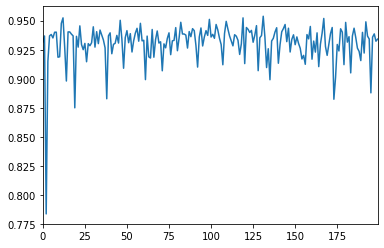

In [115]:
df.valid.plot()

In [108]:
learn = create_learner(get_model, loss_func, data)
run = Runner([AvgStatsCallback([accuracy])])
run.fit(10, learn)

train,0.8854166666666666
valid,0.9457
train,0.95285
valid,0.9551
train,0.96055
valid,0.9589
train,0.9664666666666667
valid,0.9625
train,0.96875
valid,0.9585
train,0.97235
valid,0.9659
train,0.97355
valid,0.9689
train,0.97625
valid,0.9643
train,0.9771333333333333
valid,0.9665
train,0.9786833333333333
valid,0.9641


## Baseline-2 

In [10]:
from torch.nn import init 

def get_model(data,lr=0.5,nh=50):
    m = data.train_ds.x.shape[1]
    model = nn.Sequential(nn.Linear(m,nh),nn.ReLU(),nn.Linear(nh,data.c))
    
    init.kaiming_normal_(model[0].weight)
    init.kaiming_normal_(model[2].weight)
    model[0].bias.data.zero_()
    model[2].bias.data.zero_()
    return model,optim.SGD(model.parameters(),lr=lr)

In [11]:
def running(get_model):
    learn = create_learner(get_model, loss_func, data)
    run = Runner([AvgStatsCallback([accuracy])])
    run.fit(1, learn)

In [222]:
for it in range(200):
    running(get_model)

train,0.8679333333333333
valid,0.9353


KeyboardInterrupt: 

In [208]:
q = '''
train,0.8618333333333333
valid,0.9338
train,0.8524333333333334
valid,0.9323
train,0.7508666666666667
valid,0.8989
train,0.8360166666666666
valid,0.9366
train,0.8023
valid,0.9006
train,0.83115
valid,0.9218
train,0.8555666666666667
valid,0.9291
train,0.8030166666666667
valid,0.9208
train,0.8657333333333334
valid,0.9359
train,0.8468666666666667
valid,0.9191
train,0.8205
valid,0.894
train,0.88145
valid,0.9391
train,0.8849333333333333
valid,0.9459
train,0.83145
valid,0.9277
train,0.8331
valid,0.9244
train,0.8791333333333333
valid,0.9274
train,0.8803
valid,0.9391
train,0.8708666666666667
valid,0.9333
train,0.8749333333333333
valid,0.9213
train,0.8592666666666666
valid,0.9216
train,0.8704666666666667
valid,0.9359
train,0.8308666666666666
valid,0.9255
train,0.8486666666666667
valid,0.9217
train,0.86905
valid,0.9282
train,0.8381
valid,0.9174
train,0.8805166666666666
valid,0.9432
train,0.8668833333333333
valid,0.9228
train,0.85825
valid,0.8923
train,0.8069666666666667
valid,0.9208
train,0.8166666666666667
valid,0.9078
train,0.84715
valid,0.9329
train,0.8797
valid,0.9392
train,0.8535833333333334
valid,0.9345
train,0.8623
valid,0.9321
train,0.8738166666666667
valid,0.9364
train,0.8635666666666667
valid,0.9288
train,0.8719833333333333
valid,0.8956
train,0.88755
valid,0.9384
train,0.86845
valid,0.9355
train,0.87595
valid,0.9047
train,0.8797666666666667
valid,0.9396
train,0.8596833333333334
valid,0.9113
train,0.8565666666666667
valid,0.9238
train,0.8710833333333333
valid,0.9189
train,0.8863
valid,0.9443
train,0.8400166666666666
valid,0.9191
train,0.8653333333333333
valid,0.9341
train,0.8531833333333333
valid,0.9006
train,0.7483166666666666
valid,0.8799
train,0.8826833333333334
valid,0.9166
train,0.8782
valid,0.9413
train,0.8558833333333333
valid,0.9198
train,0.8541333333333333
valid,0.9239
train,0.8775333333333334
valid,0.9156
train,0.8878833333333334
valid,0.906
train,0.8561833333333333
valid,0.9242
train,0.8546
valid,0.9294
train,0.86795
valid,0.932
train,0.8395333333333334
valid,0.9083
train,0.8406166666666667
valid,0.9238
train,0.8813333333333333
valid,0.9325
train,0.8314833333333334
valid,0.9118
train,0.88695
valid,0.9199
train,0.8634833333333334
valid,0.9312
train,0.7807
valid,0.8841
train,0.8783666666666666
valid,0.9364
train,0.86875
valid,0.946
train,0.8247166666666667
valid,0.9135
train,0.8735166666666667
valid,0.9218
train,0.8768166666666667
valid,0.9385
train,0.7929833333333334
valid,0.9148
train,0.86185
valid,0.9315
train,0.8695333333333334
valid,0.9264
train,0.85945
valid,0.9083
train,0.84805
valid,0.9074
train,0.81085
valid,0.8607
train,0.8687
valid,0.9095
train,0.8363
valid,0.9242
train,0.8795
valid,0.9357
train,0.8492666666666666
valid,0.9251
train,0.82875
valid,0.9014
train,0.80495
valid,0.9206
train,0.8859166666666667
valid,0.9387
train,0.7825833333333333
valid,0.9252
train,0.8639833333333333
valid,0.9148
train,0.8706
valid,0.9256
train,0.8544
valid,0.9267
train,0.8403833333333334
valid,0.9207
train,0.8698166666666667
valid,0.9231
train,0.8394166666666667
valid,0.9198
train,0.8816666666666667
valid,0.9403
train,0.86895
valid,0.9361
train,0.8619333333333333
valid,0.8932
train,0.87825
valid,0.9371
train,0.8562666666666666
valid,0.9274
train,0.8472166666666666
valid,0.9168
train,0.8109166666666666
valid,0.9035
train,0.8397666666666667
valid,0.9229
train,0.88245
valid,0.9394
train,0.85885
valid,0.9254
train,0.8595666666666667
valid,0.9345
train,0.8563166666666666
valid,0.9185
train,0.8223166666666667
valid,0.9156
train,0.7813833333333333
valid,0.9177
train,0.8251666666666667
valid,0.9258
train,0.8602
valid,0.9208
train,0.8010833333333334
valid,0.8773
train,0.8732
valid,0.9188
train,0.8467833333333333
valid,0.8641
train,0.8704666666666667
valid,0.9382
train,0.8668
valid,0.9344
train,0.8734833333333333
valid,0.9264
train,0.8724
valid,0.9315
train,0.8699166666666667
valid,0.9344
train,0.8435833333333334
valid,0.9254
train,0.86275
valid,0.917
train,0.84705
valid,0.9123
train,0.8329166666666666
valid,0.9289
train,0.87685
valid,0.9158
train,0.8848833333333334
valid,0.921
train,0.8197
valid,0.9176
train,0.8528666666666667
valid,0.8727
train,0.8678833333333333
valid,0.8914
train,0.8146666666666667
valid,0.9224
train,0.864
valid,0.9324
train,0.8463833333333334
valid,0.9268
train,0.8912333333333333
valid,0.9439
train,0.8680166666666667
valid,0.9346
train,0.83085
valid,0.9051
train,0.8853333333333333
valid,0.9368
train,0.83295
valid,0.9139
train,0.8767666666666667
valid,0.929
train,0.8844166666666666
valid,0.9373
train,0.8679666666666667
valid,0.9372
train,0.8606666666666667
valid,0.9344
train,0.8807833333333334
valid,0.9392
train,0.80175
valid,0.9103
train,0.8606166666666667
valid,0.9336
train,0.8142833333333334
valid,0.9131
train,0.8738666666666667
valid,0.9357
train,0.8675166666666667
valid,0.9287
train,0.81025
valid,0.8937
train,0.8624
valid,0.9186
train,0.85495
valid,0.9153
train,0.8551166666666666
valid,0.9397
train,0.8556833333333334
valid,0.9284
train,0.8631166666666666
valid,0.9128
train,0.8696166666666667
valid,0.9236
train,0.8639333333333333
valid,0.9213
train,0.8719333333333333
valid,0.9335
train,0.80615
valid,0.893
train,0.7912833333333333
valid,0.9225
train,0.88445
valid,0.9442
train,0.86845
valid,0.9324
train,0.7902166666666667
valid,0.8983
train,0.8579
valid,0.9324
train,0.8788666666666667
valid,0.9291
train,0.8792833333333333
valid,0.9341
train,0.85055
valid,0.9008
train,0.8657
valid,0.9354
train,0.8706166666666667
valid,0.9341
train,0.8565166666666667
valid,0.9302
train,0.8850166666666667
valid,0.9368
train,0.8450833333333333
valid,0.9013
train,0.7673
valid,0.8823
train,0.8671
valid,0.927
train,0.8553
valid,0.9204
train,0.8781666666666667
valid,0.926
train,0.8627666666666667
valid,0.9347
train,0.8668166666666667
valid,0.9309
train,0.8675333333333334
valid,0.9205
train,0.8652166666666666
valid,0.9374
train,0.8834
valid,0.9409
train,0.8770166666666667
valid,0.9395
train,0.8684166666666666
valid,0.9251
train,0.8507
valid,0.9227
train,0.8790333333333333
valid,0.9383
train,0.8634166666666667
valid,0.9307
train,0.8620333333333333
valid,0.9252
train,0.7800666666666667
valid,0.8948
train,0.851
valid,0.9019
train,0.8575666666666667
valid,0.9128
train,0.8927333333333334
valid,0.939
train,0.8555333333333334
valid,0.9247
train,0.8316166666666667
valid,0.9153
train,0.8739833333333333
valid,0.935
train,0.8399333333333333
valid,0.9207
train,0.8662833333333333
valid,0.9282
train,0.8923
valid,0.9481
train,0.8624166666666667
valid,0.9207
train,0.87675
valid,0.9283
train,0.8587166666666667
valid,0.9238
train,0.8705
valid,0.903
train,0.8810666666666667
valid,0.9427
train,0.8904333333333333
valid,0.9389
train,0.8676166666666667
valid,0.9369
train,0.8951166666666667
valid,0.9393
train,0.8732666666666666
valid,0.9261
train,0.8855
valid,0.9445
train,0.8548666666666667
valid,0.9215
'''.split()

In [209]:
d = {'train':[],'valid':[]}
for it in q:
    a,b = it.split(',')
    if a == 'train': d['train'].append(float(b))
    else: d['valid'].append(float(b))

df = pd.DataFrame(d)

In [210]:
df.valid.mean()

0.9229035

<AxesSubplot:>

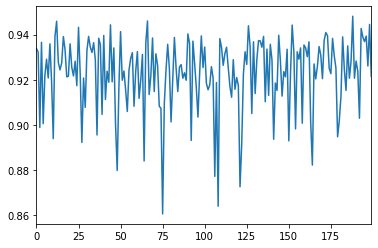

In [211]:
df.valid.plot()

In [12]:
model,opt = get_model(data)

In [13]:
model[0].weight.std()

tensor(0.0505, grad_fn=<StdBackward0>)

In [14]:
list(model[0].weight.t().detach().numpy())

[array([ 3.10095288e-02, -5.71094565e-02, -1.79665871e-02, -7.45062437e-03,
        -5.48399724e-02,  7.23687652e-03, -4.19726484e-06, -2.08755005e-02,
        -1.88512560e-02,  8.13292712e-02,  4.48796479e-03,  3.94861922e-02,
        -7.43821561e-02,  6.92171305e-02, -7.28937658e-03, -9.48024020e-02,
        -5.56321302e-03,  1.06395796e-01,  6.46601897e-03, -7.95968249e-02,
        -1.10304743e-01, -1.22661404e-01,  1.32767074e-02, -2.09289789e-03,
         7.00302944e-02, -2.23265737e-02, -6.99045360e-02,  1.25189126e-01,
        -1.34760831e-02,  2.57924329e-02,  2.65504532e-02,  8.39577839e-02,
         2.64915135e-02,  8.69566649e-02,  2.46300697e-02, -9.53749102e-03,
         5.07951155e-02,  5.28831370e-02, -2.62908041e-02,  1.57731539e-03,
        -4.67495993e-02,  8.20484236e-02,  6.08944483e-02, -4.00287360e-02,
        -5.31438701e-02, -4.32817861e-02,  2.20149495e-02, -5.28385155e-02,
         4.29730713e-02,  2.30872631e-02], dtype=float32),
 array([-0.03317187,  0.01562

In [15]:
df = pd.DataFrame(list(model[0].weight.t().detach().numpy()))

In [16]:
df.shape

(784, 50)

In [21]:
df.columns

RangeIndex(start=0, stop=50, step=1)

In [24]:
df[range(1)].plot(figsize=(10,30),)

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
df['idx'] = df.index

In [28]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,idx
167,0.015281,-0.055083,-0.000565,0.075421,0.028236,-0.004269,-0.023392,0.023934,-0.003537,-0.101822,...,-0.012141,-0.014382,0.035342,-0.017191,0.144411,-0.04442,0.022096,-0.040682,-0.016873,167


<AxesSubplot:xlabel='idx', ylabel='1'>

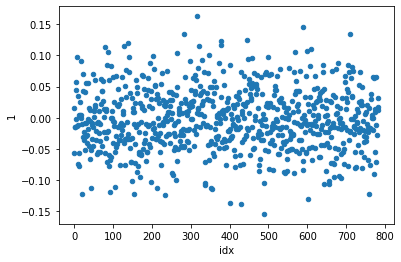

In [33]:
q = df[[1,'idx']].sort_values(1)
q.plot.scatter(x='idx',y=1)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

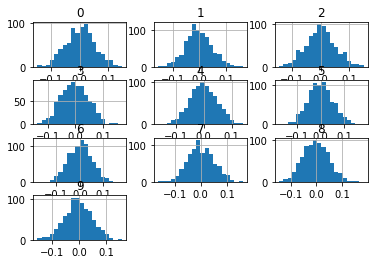

In [38]:
df[range(10)].hist(bins=20)

In [22]:
pd.DataFrame.plot??inplace=

Init signature: pd.DataFrame.plot(data)
Source:        
class FramePlotMethods(BasePlotMethods):
    """DataFrame plotting accessor and method

    Examples
    --------
    >>> df.plot.line()
    >>> df.plot.scatter('x', 'y')
    >>> df.plot.hexbin()

    These plotting methods can also be accessed by calling the accessor as a
    method with the ``kind`` argument:
    ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
    """

    def __call__(self, x=None, y=None, kind='line', ax=None,
                 subplots=False, sharex=None, sharey=False, layout=None,
                 figsize=None, use_index=True, title=None, grid=None,
                 legend=True, style=None, logx=False, logy=False, loglog=False,
                 xticks=None, yticks=None, xlim=None, ylim=None,
                 rot=None, fontsize=None, colormap=None, table=False,
                 yerr=None, xerr=None,
                 secondary_y=False, sort_columns=False, **kwds):
        return plot_frame(self._pa

In [42]:
x = torch.randn(100000,2)

In [43]:
x.mean()

tensor(0.0015)

In [44]:
x.std()

tensor(0.9987)

In [45]:
df = pd.DataFrame(list(x.detach().numpy()))

In [48]:
df.columns

RangeIndex(start=0, stop=2, step=1)

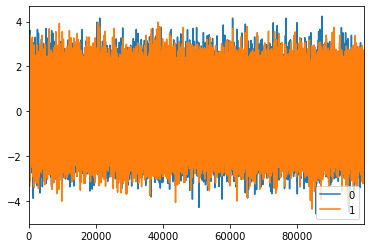

In [49]:
df.plot().scatter(x=1,y=2)

In [50]:
df.head()

,0,1
0,1.555599,-0.033177
1,0.060277,-2.434182
2,0.695752,0.045927
3,0.166024,-0.313103
4,-0.032561,0.210750


<AxesSubplot:xlabel='0', ylabel='1'>

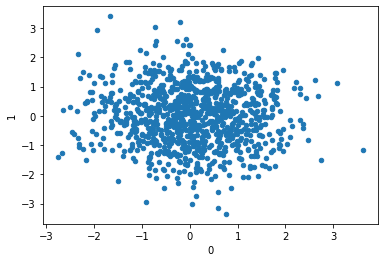

In [58]:
df.head(1000).plot.scatter(x=0,y=1)

In [115]:
x = torch.randn(10000000,2)
y = torch.randn(1000,2)
# x = torch.nn.init.xavier_uniform(x)
# x = torch.nn.init.xavier_normal(x)
x = torch.nn.init.kaiming_normal_(x)
y = torch.nn.init.kaiming_normal_(y)

In [116]:
x.shape

torch.Size([10000000, 2])

In [117]:
x.mean(),x.std()

(tensor(-9.4730e-05), tensor(0.9999))

<AxesSubplot:xlabel='0', ylabel='1'>

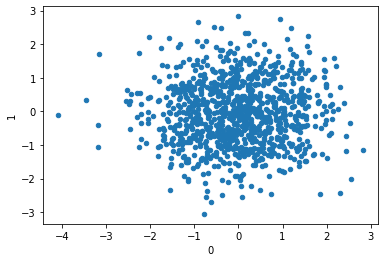

In [118]:
df = pd.DataFrame(list(y.detach().numpy()))
df.head(1000).plot.scatter(x=0,y=1)

<AxesSubplot:xlabel='0', ylabel='1'>

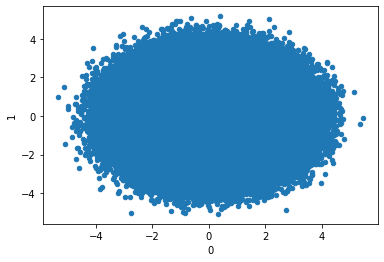

In [120]:
df = pd.DataFrame(list(x.detach().numpy()))
df.plot.scatter(x=0,y=1)

<AxesSubplot:xlabel='0', ylabel='1'>

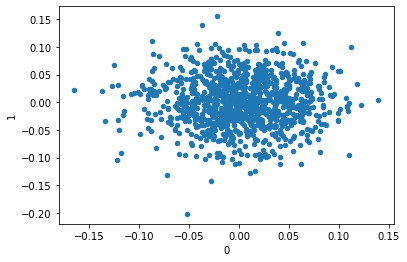

In [95]:
# Notice the scaling difference between the shape. 
# Both are Xavier Normal 
df.head(1000).plot.scatter(x=0,y=1)

<AxesSubplot:xlabel='0', ylabel='1'>

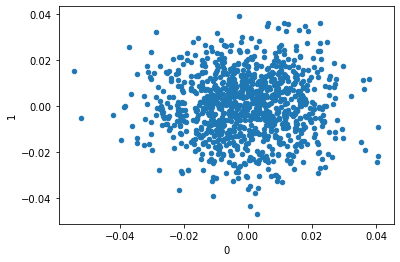

In [77]:
#x = torch.randn(10000,2)
df.head(1000).plot.scatter(x=0,y=1)